In [1]:
#classification 
#svm
#confussion matrix,classification report 
#logistic regression,decission tree classifier,random forest classifier 
#titanic,heartattack 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df = df.drop(["Cabin"], axis='columns')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [6]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [7]:
median=df.Age.median()

In [8]:
df.Age=df.Age.fillna(median)
df.Fare=df.Fare.fillna(df.Fare.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [12]:
df = df.drop(["Name"], axis='columns')

In [13]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [14]:
df.Sex=df.Sex.replace(["male"],'1')
df.Sex=df.Sex.replace(["female"],'0')

In [15]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,1,34.5,0,0,330911,7.8292,Q
1,893,1,3,0,47.0,1,0,363272,7.0000,S
2,894,0,2,1,62.0,0,0,240276,9.6875,Q
3,895,0,3,1,27.0,0,0,315154,8.6625,S
4,896,1,3,0,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,0,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,1,27.0,0,0,359309,8.0500,S


In [16]:
df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [17]:
df.Embarked=df.Embarked.replace(['Q'],'0')
df.Embarked=df.Embarked.replace(['S'],'1')
df.Embarked=df.Embarked.replace(['C'],'2')

In [18]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,1,34.5,0,0,330911,7.8292,0
1,893,1,3,0,47.0,1,0,363272,7.0000,1
2,894,0,2,1,62.0,0,0,240276,9.6875,0
3,895,0,3,1,27.0,0,0,315154,8.6625,1
4,896,1,3,0,22.0,1,1,3101298,12.2875,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,A.5. 3236,8.0500,1
414,1306,1,1,0,39.0,0,0,PC 17758,108.9000,2
415,1307,0,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,1
416,1308,0,3,1,27.0,0,0,359309,8.0500,1


In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [20]:
df=df.drop("Ticket",axis='columns')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,0
1,893,1,3,0,47.0,1,0,7.0000,1
2,894,0,2,1,62.0,0,0,9.6875,0
3,895,0,3,1,27.0,0,0,8.6625,1
4,896,1,3,0,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,8.0500,1
414,1306,1,1,0,39.0,0,0,108.9000,2
415,1307,0,3,1,38.5,0,0,7.2500,1
416,1308,0,3,1,27.0,0,0,8.0500,1


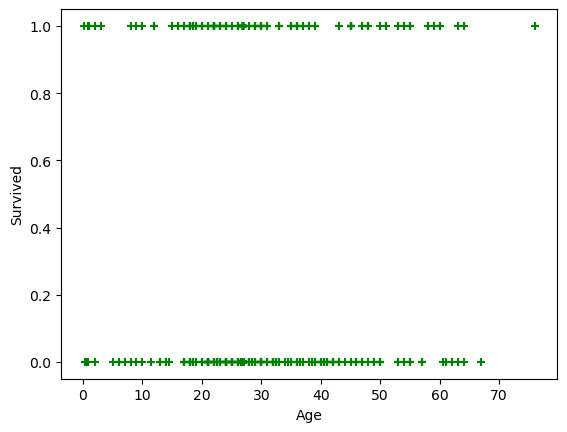

In [21]:
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Survived')
plt.scatter(df.Age,df.Survived,color='green',marker='+')

In [22]:
x=df.drop("Survived",axis='columns')
y=df.Survived

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [24]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
408,1300,3,0,27.0,0,0,7.7208,0
411,1303,1,0,37.0,1,0,90.0000,0
407,1299,1,1,50.0,1,1,211.5000,2
49,941,3,0,36.0,0,2,15.9000,1
244,1136,3,1,27.0,1,2,23.4500,1
...,...,...,...,...,...,...,...,...
283,1175,3,0,9.0,1,1,15.2458,2
322,1214,2,1,26.0,0,0,13.0000,1
288,1180,3,1,27.0,0,0,7.2292,2
19,911,3,0,45.0,0,0,7.2250,2


In [25]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
250,1142,2,0,0.92,1,2,27.7500,1
199,1091,3,0,27.00,0,0,8.1125,1
84,976,2,1,27.00,0,0,10.7083,0
383,1275,3,0,19.00,1,0,16.1000,1
94,986,1,1,25.00,0,0,26.0000,2
...,...,...,...,...,...,...,...,...
302,1194,2,1,43.00,0,1,21.0000,1
247,1139,2,1,42.00,1,1,32.5000,1
191,1083,1,1,27.00,0,0,26.0000,1
56,948,3,1,35.00,0,0,7.8958,1


In [26]:
y_train

408    1
411    1
407    0
49     1
244    0
      ..
283    1
322    0
288    0
19     1
413    0
Name: Survived, Length: 209, dtype: int64

In [27]:
y_test

250    1
199    1
84     0
383    1
94     0
      ..
302    0
247    0
191    0
56     0
42     0
Name: Survived, Length: 209, dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [29]:
le.fit(X_train,y_train)

LinearRegression()

In [30]:
le.predict(X_test)

array([ 1.00000000e+00,  1.00000000e+00, -1.13242749e-14,  1.00000000e+00,
       -3.10862447e-15, -1.08801856e-14, -9.10382880e-15, -1.53210777e-14,
        1.00000000e+00,  1.00000000e+00, -1.48769885e-14, -1.11022302e-14,
       -2.22044605e-15,  1.00000000e+00, -1.48769885e-14, -9.10382880e-15,
       -1.37667655e-14,  1.00000000e+00, -1.44328993e-14, -1.90958360e-14,
        1.00000000e+00, -1.08801856e-14,  5.66213743e-15, -1.59872116e-14,
        1.00000000e+00,  1.23234756e-14, -1.55431223e-14,  1.00000000e+00,
        1.22124533e-14, -1.26565425e-14, -1.48769885e-14, -1.50990331e-14,
       -1.37667655e-14,  1.00000000e+00, -7.10542736e-15, -1.50990331e-14,
        1.00000000e+00, -1.44328993e-14,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -1.70974346e-14,  1.00000000e+00,
       -1.46549439e-14, -1.68753900e-14, -1.39888101e-14, -1.46549439e-14,
       -1.50990331e-14,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -1.39888101e-14, -

In [31]:
le.score(X_test,y_test)

1.0

In [32]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [33]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
model.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
y_test

250    1
199    1
84     0
383    1
94     0
      ..
302    0
247    0
191    0
56     0
42     0
Name: Survived, Length: 209, dtype: int64

In [36]:
model.score(X_test,y_test)

1.0

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

In [43]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [44]:
model.predict(X_test)

In [45]:
model.score(X_test,y_test)

1.0

In [52]:
from sklearn.svm import SVC
model=SVC()

In [53]:
model.fit(X_train,y_train)

SVC()

In [59]:
y_predict=model.predict(X_test)

In [60]:
model.score(X_test,y_test)

0.6650717703349283

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[139,   0],
       [ 70,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

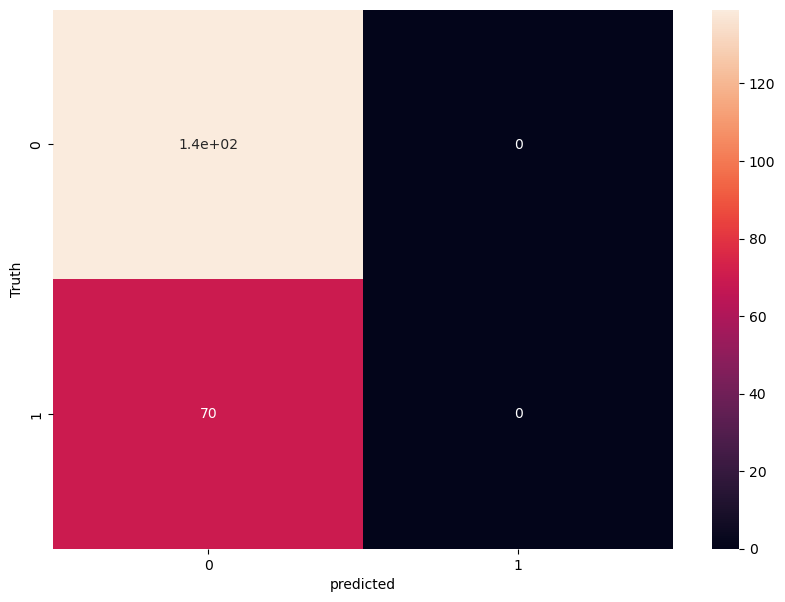

In [62]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       139
           1       0.00      0.00      0.00        70

    accuracy                           0.67       209
   macro avg       0.33      0.50      0.40       209
weighted avg       0.44      0.67      0.53       209



C:\Users\Alpha11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alpha11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alpha11\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
